# PART 1

# Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Load Dataset

In [21]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Description

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

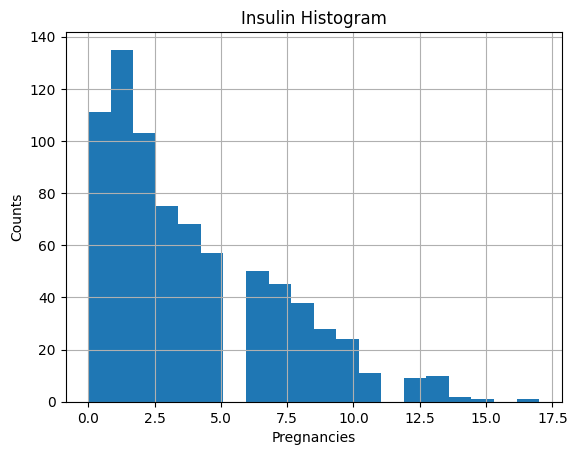

In [23]:
df['Pregnancies'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

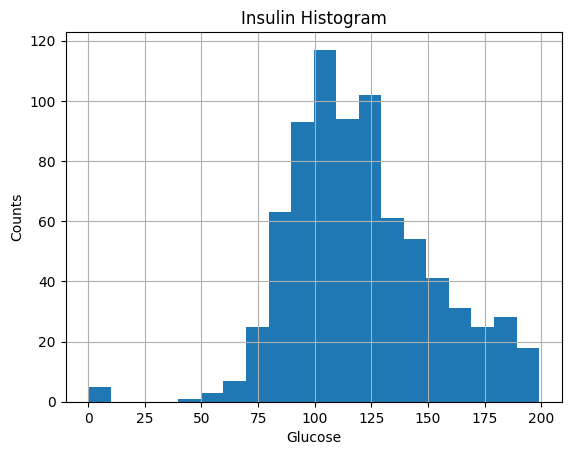

In [ ]:
df['Glucose'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

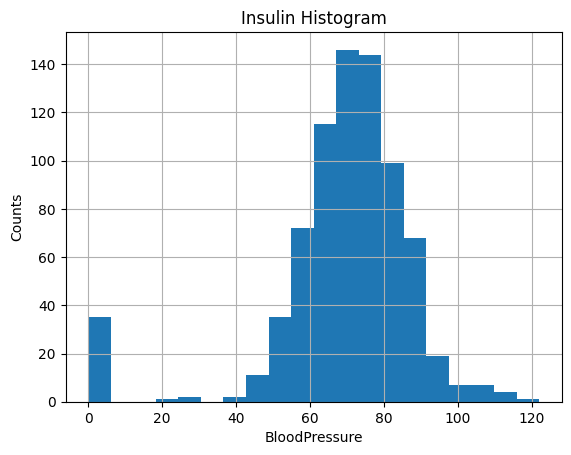

In [ ]:
df['BloodPressure'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

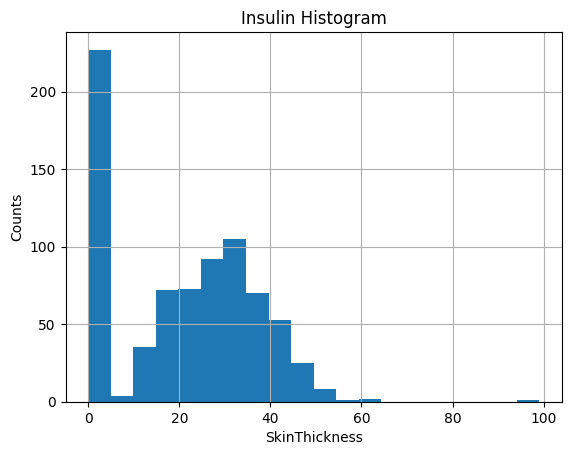

In [ ]:
df['SkinThickness'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

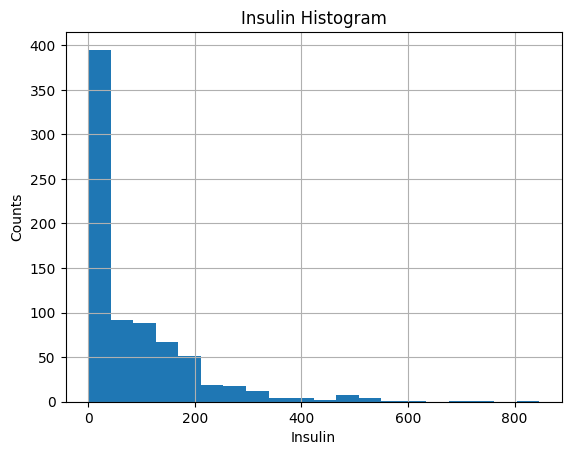

In [ ]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

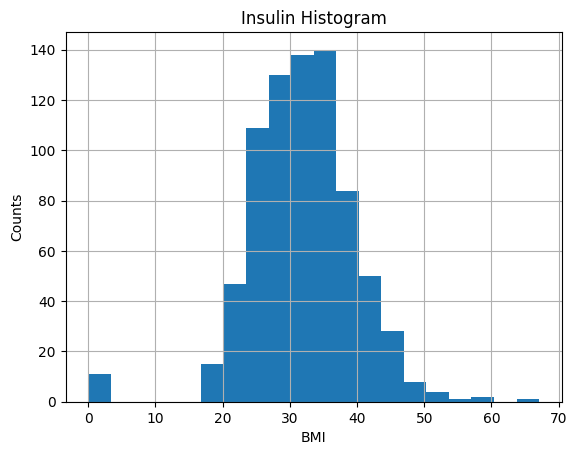

In [ ]:
df['BMI'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

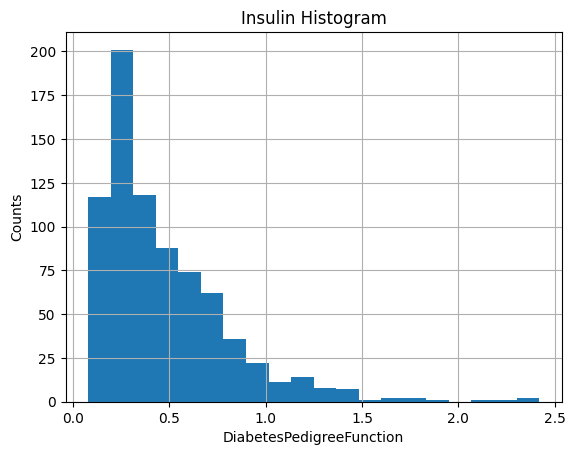

In [ ]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

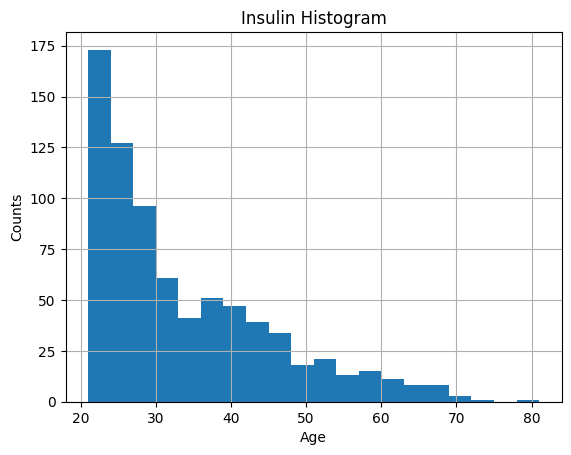

In [ ]:
df['Age'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

# Plot Outcome

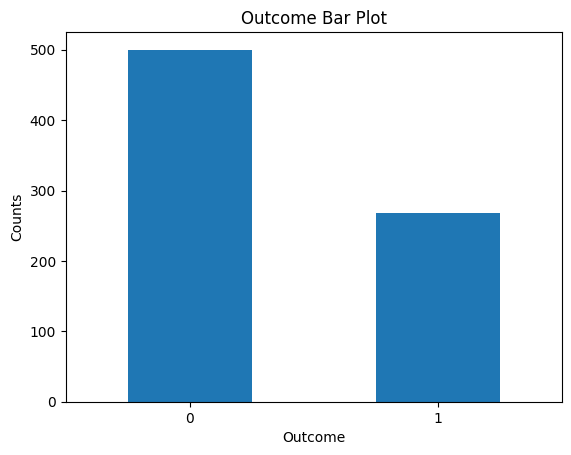

In [24]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Outcome Bar Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

# Data Quality Evaluation


 **Question 2**

The dataset contains inconsistencies and potential errors that could affect analysis.
1. The minimal values for a number of some attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI) are zero, which is unrealistic for human measurements. These zeros most likely indicate data that is invalid or missing.
2. The Insulin variable shows very high variability (standard deviation of 115 compared to a mean of about 80), and an extreme maximum value of 846, indicating the existence of inaccurate measurements or outliers.

**Question 3**

This distribution is not ideal, because it does not represent all age groups equally. We can see from the plot that the most individuals are young adults (around 20–40 years old), with fewer older participants.

**Question 4**

The next cell shows that those with diabetes have an average glucose level of about 141, but those without have an average of about 110. Comparing this difference to what is typically seen in clinical research, it is not significant enough to draw an accurate conclusion.

In [ ]:
df.groupby('Outcome')['Glucose'].mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


# Convert DataFrame to Numpy arrays

In [25]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

In [26]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Create a Logistic Regression Model

In [27]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [28]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [29]:
y_train_pred = model.predict(x_train)
y_test_pred  = model.predict(x_test)

In [30]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test,  y_test_pred)

print(f"Training accuracy: {round(train_acc*100, 2)}")
print(f"Test accuracy: {round(test_acc*100, 2)}")

Training accuracy: 76.54
Test accuracy: 77.92


The two values are very close, so the model works about the same on both sets.  
This means it generalizes well and is not overfitting.


# Evaluate Patients for each age

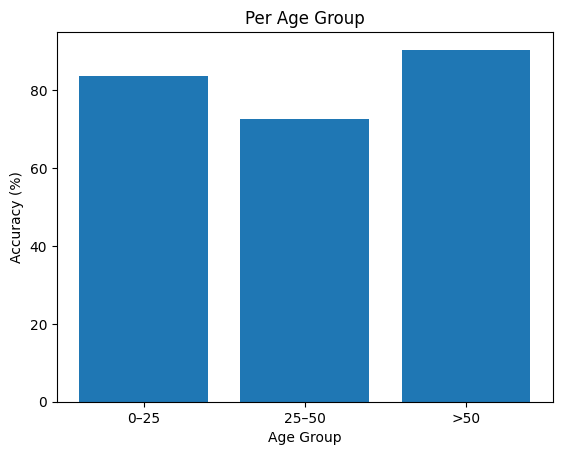

In [31]:
age_index = 7
mask_0_25 = x_test[:, age_index] < 25
mask_25_50 = (x_test[:, age_index] >= 25) & (x_test[:, age_index] <= 50)
mask_over_50 = x_test[:, age_index] > 50

x_test_0_25, y_test_0_25 = x_test[mask_0_25], y_test[mask_0_25]
x_test_25_50, y_test_25_50 = x_test[mask_25_50], y_test[mask_25_50]
x_test_over_50, y_test_over_50 = x_test[mask_over_50], y_test[mask_over_50]

y_pred_0_25 = model.predict(x_test_0_25)
y_pred_25_50 = model.predict(x_test_25_50)
y_pred_over_50 = model.predict(x_test_over_50)

acc_0_25 = accuracy_score(y_test_0_25, y_pred_0_25)
acc_25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
acc_over_50 = accuracy_score(y_test_over_50, y_pred_over_50)

age_groups = ['0–25', '25–50', '>50']
accuracies = [acc_0_25 * 100, acc_25_50 * 100, acc_over_50 * 100]

plt.bar(age_groups, accuracies)
plt.title('Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy (%)')
plt.show()

Not every age group experiences the same level of performance from the model.  
The classifier predicts better for some age groups than others.

# Question 8

It is worse if the model says a person does not have diabetes while they actually do.  
This mistake is dangerous because the person will not get the treatment they need.

# Question 9

In [32]:
accuracies = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)

mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print(f"Average accuracy: {round(mean_acc*100, 2)}")
print(f"Standard deviation: {round(std_acc*100, 2)}")

Average accuracy: 77.27
Standard deviation: 1.87


# Question 10

In [33]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(input_df)
y = targets_df.to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

coeffs = model.coef_[0]

In [34]:
importance = np.abs(coeffs)

top3_indices = importance.argsort()[-3:][::-1]
top3_features = input_df.columns[top3_indices]
top3_coeffs = coeffs[top3_indices]

for feature, coeff in zip(top3_features, top3_coeffs):
    print(f"{feature}: {coeff:.4f}")

Glucose: 4.3408
BMI: 2.9541
Age: 1.3183


After applying Min–Max normalization, the three most important factors for predicting diabetes are **Glucose**, **BMI**, and **Age**.

# PART 2

# Question 1

In [35]:
df = pd.read_csv('diabetes.csv')
feature_cols = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
target_col = 'Glucose'

x = df[feature_cols].to_numpy()
y = df[target_col].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

# Question 2

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")

Mean Squared Error (MSE): 929.89
Mean Absolute Error (MAE): 23.6


The MAE is better because it shows the average error in glucose units and is less affected by big mistakes.

# Question 3

In [38]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=10000, random_state=0)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([alpha, round(mae, 2)])

print("Alpha | MAE")
for alpha, mae in results:
    print(f"{alpha:5} | {mae}")

Alpha | MAE
  0.2 | 23.59
  0.4 | 23.59
  0.6 | 23.58
  0.8 | 23.58
  1.0 | 23.57


# Question 4

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

coeffs = model.coef_
for feature, coef in zip(['Pregnancies', 'BloodPressure', 'BMI', 'Age'], coeffs):
    print(f"{feature}: {coef:.4f}")

Pregnancies: -0.1682
BloodPressure: 0.0408
BMI: 0.9421
Age: 0.7684


In [40]:
feature_cols_reduced = ['Pregnancies', 'BMI', 'Age']

x_reduced = df[feature_cols_reduced].to_numpy()
y = df['Glucose'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae_reduced = mean_absolute_error(y_test, y_pred)

print(f"MAE after removing BloodPressure: {round(mae_reduced, 2)}")

MAE after removing BloodPressure: 23.62
